In [1]:
from nxs_analysis_tools import load_data
from nxs_analysis_tools.pairdistribution import Symmetrizer3D

In [2]:
data = load_data('example_data/pairdistribution_data/test_hkli.nxs')

data:NXdata
  @axes = ['H', 'K', 'L']
  @signal = 'counts'
  H = float64(100)
  K = float64(150)
  L = float64(200)
  counts = float64(100x150x200)


In [3]:
s = Symmetrizer3D(data)


Plane 1: HK
Plane 2: HL
Plane 3: KL


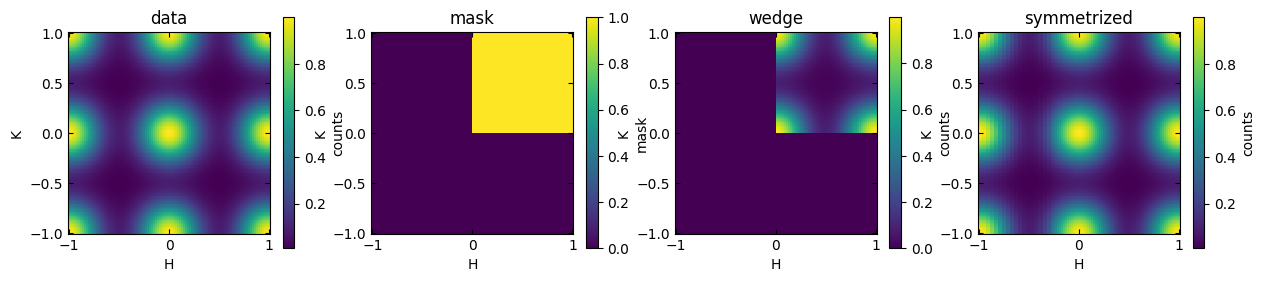

In [4]:
s.set_plane1symmetrizer(theta_min=0, theta_max=90, mirror=True)
s.test_plane1(data[:,:,len(data.L)//2])

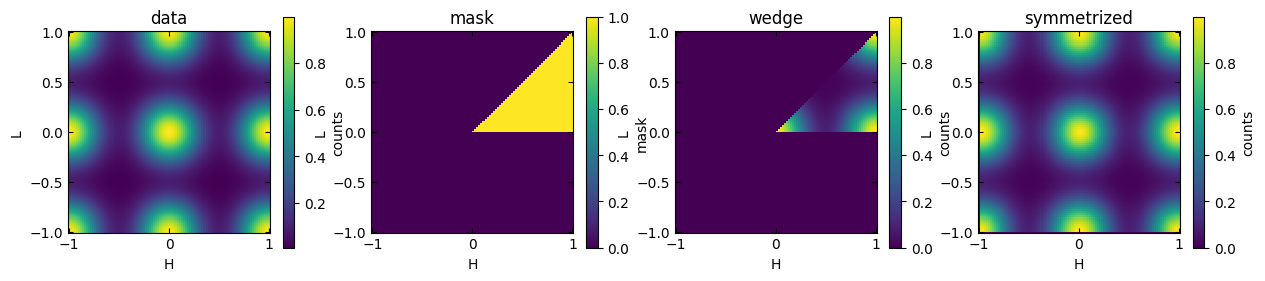

In [5]:
s.set_plane2symmetrizer(theta_min=45, theta_max=90, mirror=True)
s.test_plane2(data[:,len(data.K)//2,:])

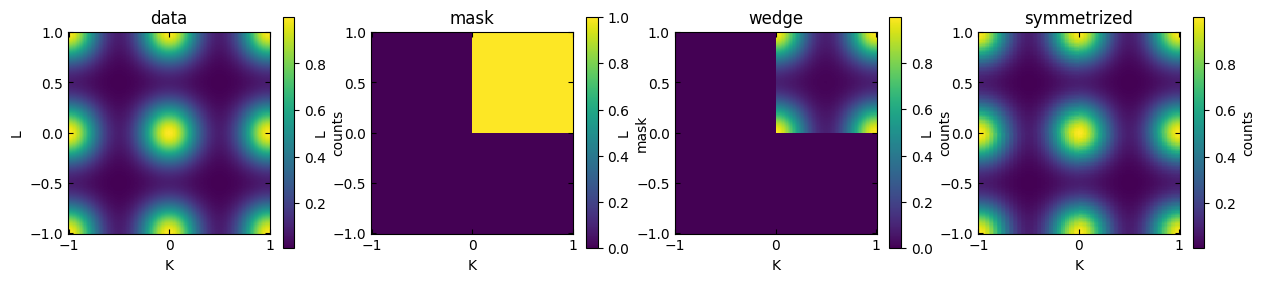

In [6]:
s.set_plane3symmetrizer(theta_min=0, theta_max=90, mirror=False)
s.test_plane3(data[len(data.H)//2,:,:])

In [7]:
s.symmetrize()

Symmetrizing HK planes...
Symmetrized HK planes.97487437185......
Symmetrizing HL planes...
Symmetrized HL planes.71812080537......
Symmetrizing KL planes...
Symmetrized KL planes.79797979799......
Symmetriztaion finished in 0.7816108067830404 minutes.


NXdata('data')